# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "82db759698c15daf45f70abd9fc6998b694cc049"
connection.set_access_token(API_TOKEN)

# Strategy Creation

In [5]:
from inverse_ema_scalping_crossover import StrategyInverseEMAScalpingRegularOrder as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 130111,
 'strategyId': '41ab756dd7314c48835e95c9d5707c7f'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Import Strategy from pyaglostrategypool

In [ ]:
! wget -O inverse_ema_scalping_crossover.py https://raw.githubusercontent.com/algobulls/pyalgostrataegypool/master/pyalgostrategypool/inverse_ema_scalping.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' inverse_ema_scalping_crossover.py

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('MARUTI', exchange='NSE')
instrument

[{'id': 111759, 'value': 'NSE:JAYBARMARU'},
 {'id': 8, 'value': 'NSE:MARUTI'},
 {'id': 1674237, 'value': 'NSE:MARUTI.AF'},
 {'id': 1674311, 'value': 'NSE:MARUTI.BL'},
 {'id': 1674456, 'value': 'NSE:MARUTI.RL'},
 {'id': 30173, 'value': 'NSE:MARUTI20NOV4800CE'},
 {'id': 30174, 'value': 'NSE:MARUTI20NOV4800PE'},
 {'id': 30175, 'value': 'NSE:MARUTI20NOV4900CE'},
 {'id': 30176, 'value': 'NSE:MARUTI20NOV4900PE'},
 {'id': 30177, 'value': 'NSE:MARUTI20NOV5000CE'}]

## Setup Parameters

In [9]:
parameters = {
  'SMALLER_TIME_PERIOD': 12,
  'LARGER_TIME_PERIOD': 20,
}

In [10]:
initial_virtual_funds = 70000     # in Rupees

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:MARUTI', 
    lots=3,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'Inverse EMA Scalping Regular Order Strategy' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════════════════════════════════╕
│ Config                  │ Value                                                 │
╞═════════════════════════╪═══════════════════════════════════════════════════════╡
│ Strategy Name           │ Inverse EMA Scalping Regular Order Strategy           │
├─────────────────────────┼───────────────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                           │
├─────────────────────────┼───────────────────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:MARUTI']                                        │
├─────────────────────────┼───────────────────────────────────────────────────────┤
│ Quantity/Lots           │ 3                                                     │
├─────────────────────────┼─────────────────────────────────────────

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STOPPED', 'status': 0}

### Logs

In [13]:
logs = connection.get_backtesting_logs(strategy)

In [14]:
print(logs)

[2023-08-22 16:00:52] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-22 16:00:52] Sanity checks on cfg successful.
[2023-08-22 16:00:52] Currency set to "INR"
[2023-08-22 16:00:52] Setting up broker connection...
[2023-08-22 16:00:54] Broker connection has been setup successfully.
[2023-08-22 16:00:54] (NSE_EQ) Funds available in client's ABVIRTUALBROKER account is : INR '70000.00'
[2023-08-22 16:00:54] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-08-22 16:00:54] Welcome ALGOBULLS VIRTUAL USER!
[2023-08-22 16:00:54] Reading strategy...
[2023-08-22 16:00:54] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #   # 

### Stop

In [15]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [16]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute
0,NSE,MARUTI,2021-08-03 12:15:00+05:30,SELL,3,₹,7143.10,2021-08-03 15:30:00+05:30,BUY,3,₹,7195.85,-158.25,-158.25
1,NSE,MARUTI,2021-08-05 11:15:00+05:30,BUY,3,₹,7032.45,2021-08-05 15:30:00+05:30,SELL,3,₹,7023.95,-25.50,-183.75
2,NSE,MARUTI,2021-08-06 13:15:00+05:30,SELL,3,₹,7131.20,2021-08-06 15:30:00+05:30,BUY,3,₹,7097.90,99.90,-83.85
3,NSE,MARUTI,2021-08-09 11:15:00+05:30,BUY,3,₹,7091.90,2021-08-09 15:30:00+05:30,SELL,3,₹,7081.90,-30.00,-113.85
4,NSE,MARUTI,2021-08-30 14:15:00+05:30,SELL,3,₹,6798.00,2021-08-30 15:30:00+05:30,BUY,3,₹,6796.45,4.65,-109.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,NSE,MARUTI,2023-07-11 11:15:00+05:30,SELL,3,₹,9915.00,2023-07-11 15:30:00+05:30,BUY,3,₹,9902.00,39.00,-4481.40
129,NSE,MARUTI,2023-07-13 10:15:00+05:30,BUY,3,₹,9778.00,2023-07-13 15:30:00+05:30,SELL,3,₹,9659.90,-354.30,-4835.70
130,NSE,MARUTI,2023-07-20 14:15:00+05:30,SELL,3,₹,9741.90,2023-07-20 15:30:00+05:30,BUY,3,₹,9763.80,-65.70,-4901.40
131,NSE,MARUTI,2023-07-28 10:15:00+05:30,BUY,3,₹,9699.95,2023-07-28 15:30:00+05:30,SELL,3,₹,9664.65,-105.90,-5007.30


### Statistics Reports

#### Statistics

In [17]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-03
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      89.0%

Cumulative Return   -6.98%
CAGR﹪              -3.57%

Sharpe              -2.2
Prob. Sharpe Ratio  4.04%
Sortino             -2.58
Sortino/√2          -1.82
Omega               0.64

Max Drawdown        -7.58%
Longest DD Days     629

Gain/Pain Ratio     -0.37
Gain/Pain (1M)      -0.64

Payoff Ratio        0.67
Profit Factor       0.64
Common Sense Ratio  0.53
CPC Index           0.21
Tail Ratio          0.82
Outlier Win Ratio   4.37
Outlier Loss Ratio  4.36

MTD                 -0.79%
3M                  -1.5%
6M                  -2.6%
YTD                 -2.69%
1Y                  -3.84%
3Y (ann.)           -3.57%
5Y (ann.)           -3.57%
10Y (ann.)          -3.57%
All-time (ann.)     -3.57%

Avg. Drawdown       -1.99%
Avg. Drawdown Days  174
Recovery Factor     -0.92
Ulcer Index         0.04
Serenity Index    

#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-03
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             89.0%

Cumulative Return          -6.98%
CAGR﹪                     -3.57%

Sharpe                     -2.2
Prob. Sharpe Ratio         4.04%
Smart Sharpe               -1.96
Sortino                    -2.58
Smart Sortino              -2.29
Sortino/√2                 -1.82
Smart Sortino/√2           -1.62
Omega                      0.64

Max Drawdown               -7.58%
Longest DD Days            629
Volatility (ann.)          6.13%
Calmar                     -0.47
Skew                       -1.32
Kurtosis                   4.91

Expected Daily %           -0.05%
Expected Monthly %         -0.3%
Expected Yearly %          -2.38%
Kelly Criterion            -27.3%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.69%
Expected Shortfall (cVaR)  -0.69%

Max Consecutive Wins

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-11-09,2023-07-31,2023-07-31,629,-7.577671,-7.388389
2,2021-10-06,2021-10-07,2021-10-28,21,-0.207321,-0.103874
3,2021-08-09,2021-09-13,2021-09-24,46,-0.130013,-0.115853
4,2021-08-05,2021-08-05,2021-08-06,1,-0.036511,0.000000


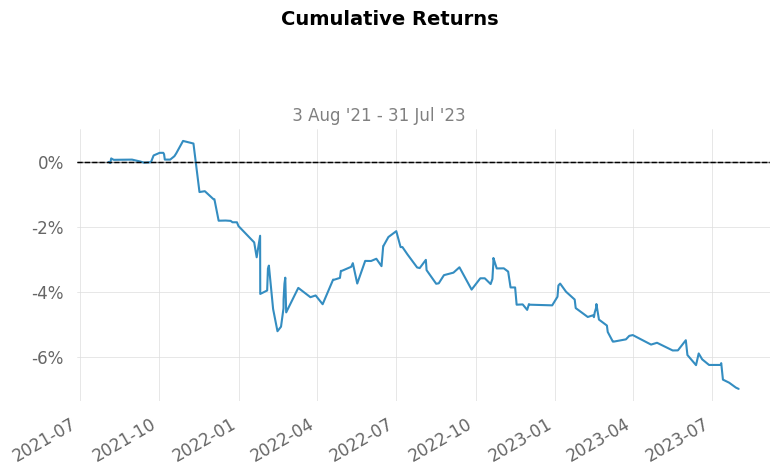

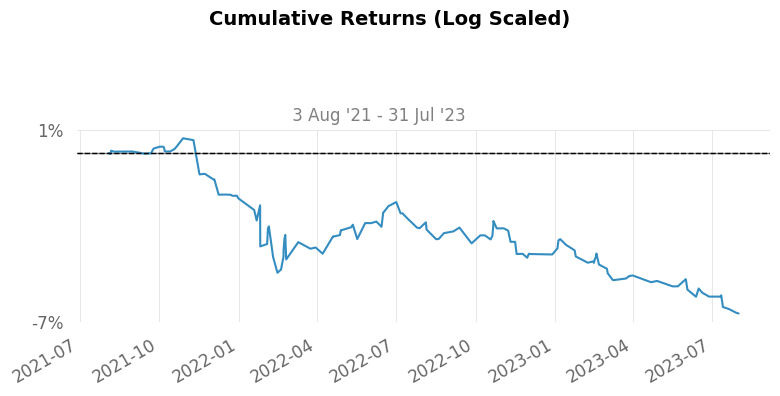

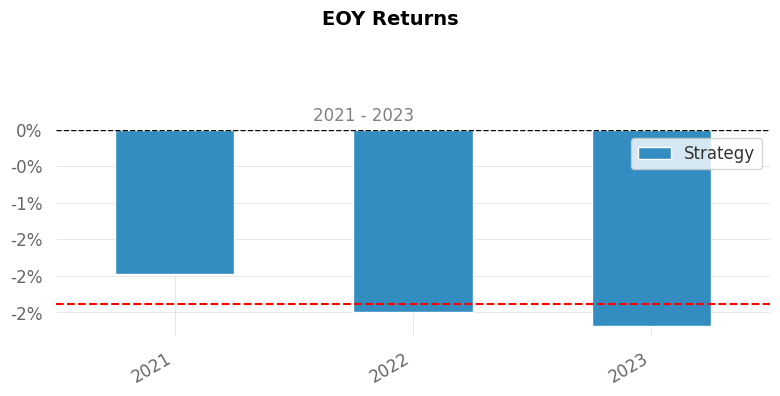

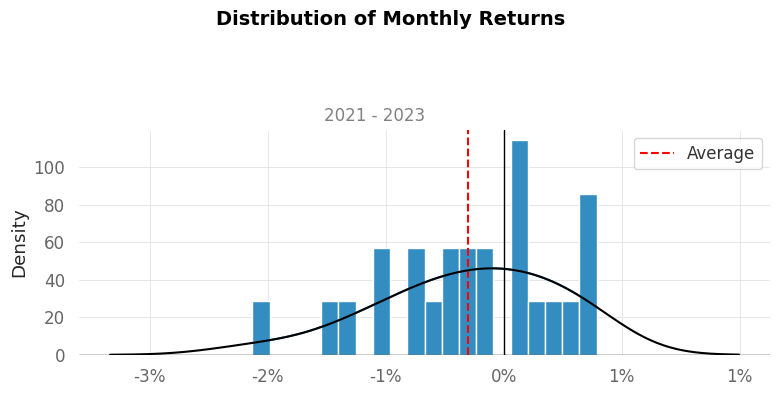

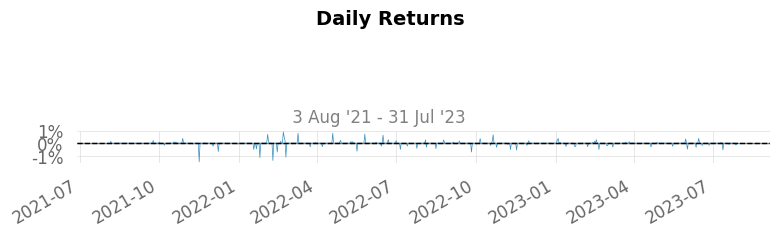

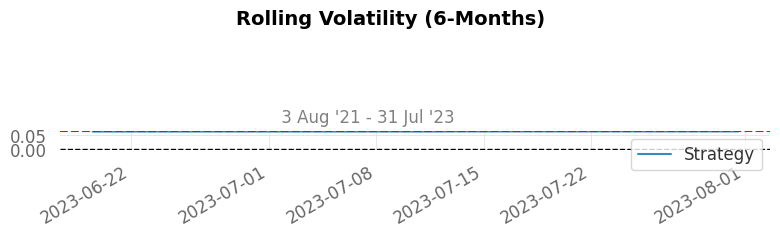

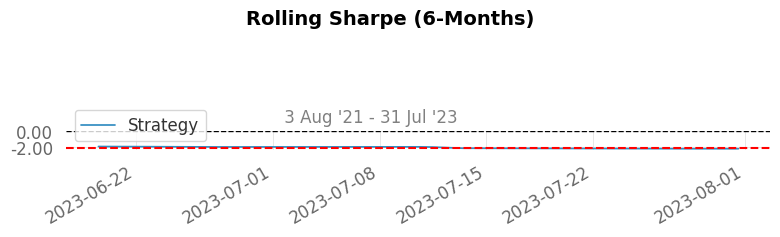

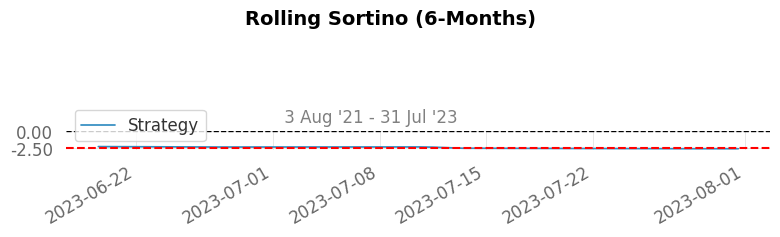

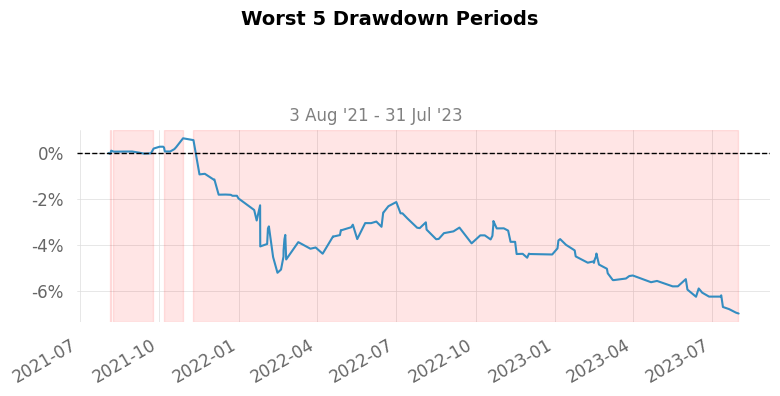

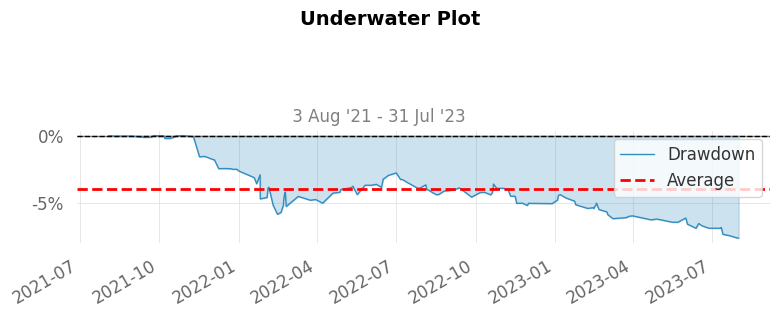

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


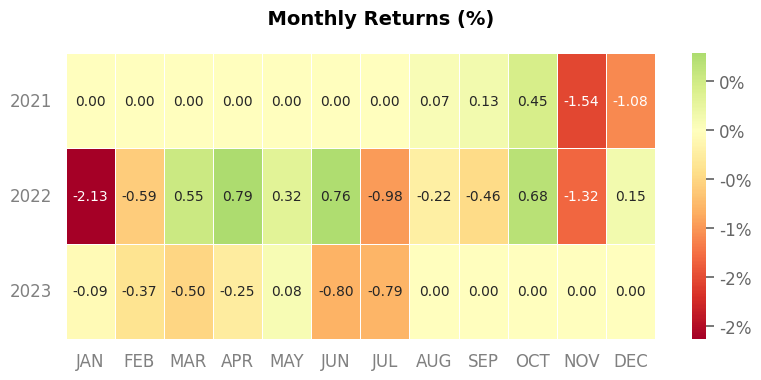

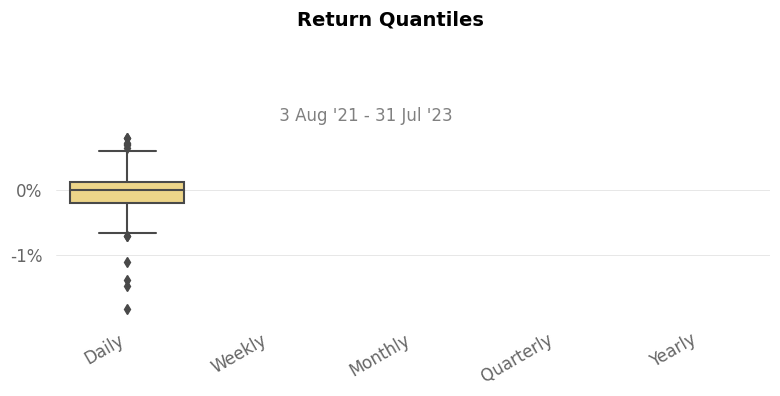

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [18]:
connection.get_backtesting_report_statistics(strategy, mode='quantstats', report='full', html_dump=True, initial_funds=initial_virtual_funds)

### Order History

In [19]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)



+---------------+---------------------------+----------------------------------+------+
| INST          | TIME                      | ID                               | TT   |
|---------------+---------------------------+----------------------------------+------|
| NSE_EQ:MARUTI | 2021-08-03 12:15:00+05:30 | 3261b53da509435a92b817d1eae78fb8 | SELL |
+---------------+---------------------------+----------------------------------+------+
+----+---------------------------+------------------------+-------+
|    | TIME                      | STATE                  | MSG   |
|----+---------------------------+------------------------+-------|
|  0 | 2021-08-03 12:15:00+05:30 | PUT ORDER REQ RECEIVED |       |
|  1 | 2021-08-03 12:15:00+05:30 | VALIDATION PENDING     |       |
|  2 | 2021-08-03 12:15:00+05:30 | OPEN PENDING           |       |
|  3 | 2021-08-03 12:15:00+05:30 | OPEN                   |       |
|  4 | 2021-08-03 12:15:00+05:30 | COMPLETE               |       |
+----+--------

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:MARUTI', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---